In [6]:
import psycopg2
import pandas as pd

# データベースに接続
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="0712"
)

# カーソルを作成
cur = conn.cursor()

# # 接続されているデータベース名を取得する
# cur.execute("SELECT current_database();")
# db_name = cur.fetchone()[0]
# print("接続されているデータベース名:", db_name)

# # テーブル名を一覧で取得する
# cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'")
# table_names = cur.fetchall()
# for table_name in table_names:
#     print(table_name[0])
    

# データを取得するSQLクエリを作成
# sql_query = "SELECT * FROM rah WHERE vec = 'QN-233'"
sql_query = "SELECT * FROM rah WHERE vec LIKE '%QN-30%'"

# SQLクエリを実行
cur.execute(sql_query)

# 検索結果を取得
results = cur.fetchall()
clmname = [desc[0] for desc in cur.description]
df = pd.DataFrame(results, columns=clmname)

# 検索結果を表示
print(df)

# カーソルと接続をクローズ
cur.close()
conn.close()



      vec    cgh     yaw   pitch    roll  id
0  QN-301  500.0  2000.1  1000.0  1500.5   7
1  QN-302  450.0  1800.0  1000.0  1500.5   8
2  QN-303  600.0  2200.0  1000.0  1500.5   9
3  QN-304  550.0  2100.0  1000.0  1500.5  10
4  QN-305  530.0  2215.0  1000.0  1500.5  11
5  QN-306  480.0  1980.0  1000.0  1500.5  12


Enter the first column:  cgh
Enter the second column:  yaw


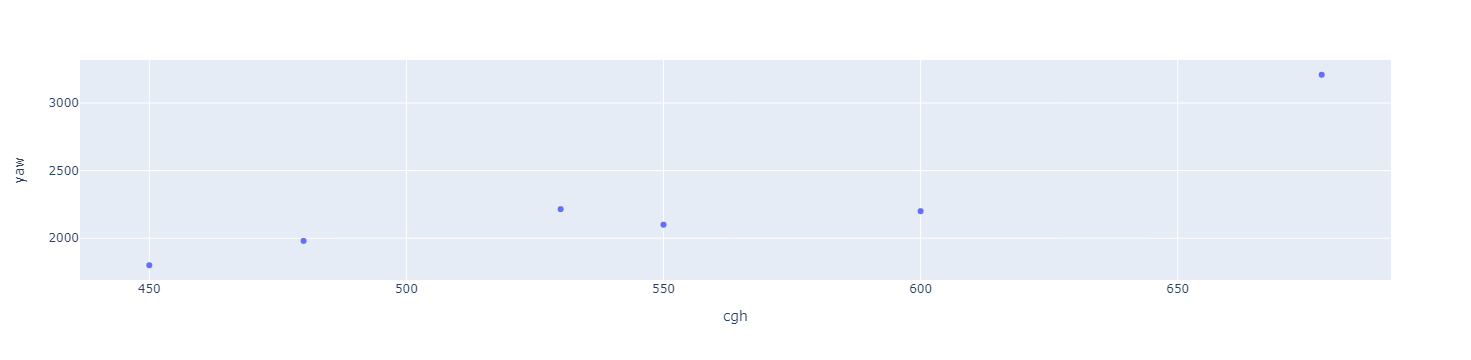

In [20]:
import psycopg2
import pandas as pd
import plotly.express as px

# データベースに接続
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="0712"
)

# カーソルを作成
cur = conn.cursor()

# ユーザーからの入力を受け取る
db1 = input("Enter the first table: ")
column1 = input("Enter the first column: ")
db2 = input("Enter the second table: ")
column2 = input("Enter the second column: ")

# クエリを生成し、実行する
sql_query = f"SELECT vec, {column1} FROM {db1} WHERE vec LIKE '%QN-30%';"
cur.execute(sql_query)
result1 = cur.fetchall()
sql_query = f"SELECT vec, {column2} FROM {db2} WHERE vec LIKE '%QN-30%';"
cur.execute(sql_query)
result2 = cur.fetchall()

# 結果をDataFrameに変換する
df1 = pd.DataFrame(result1, columns=['vec', column1])
df2 = pd.DataFrame(result2, columns=['vec', column2])

# vec列を除外する
df1.drop('vec', axis=1, inplace=True)
df2.drop('vec', axis=1, inplace=True)

# 2つのDataFrameを結合する
df = pd.concat([df1, df2], axis=1)

# 散布図グラフを描画する
fig = px.scatter(df, x=column1, y=column2)
fig.show()



In [ ]:
y